In [30]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pandas.plotting import register_matplotlib_converters
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
register_matplotlib_converters()

In [4]:
# reading the data
df = pd.read_csv('../Datasets/istanbul_stock_dataset.csv', parse_dates = ['date'])

In [5]:
df.head()

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,date
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,2009-01-05
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,2009-01-06
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,2009-01-07
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,2009-01-08
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,2009-01-09


In [6]:
# setting the 'date' column as the index  
if 'date' in df.columns:
    df.set_index('date', inplace=True)

In [7]:
df.head()

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 536 entries, 2009-01-05 to 2011-02-22
Data columns (total 9 columns):
ISE_TL     536 non-null float64
ISE_USD    536 non-null float64
SP         536 non-null float64
DAX        536 non-null float64
FTSE       536 non-null float64
NIKKEI     536 non-null float64
BOVESPA    536 non-null float64
EU         536 non-null float64
EM         536 non-null float64
dtypes: float64(9)
memory usage: 41.9 KB


In [9]:
# checking for duplicates
df.duplicated().any()

False

In [10]:
df.describe()

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.001629,0.001552,0.000643,0.000721,0.000510,0.000308,0.000935,0.000471,0.000936
std,0.016264,0.021122,0.014093,0.014557,0.012656,0.014850,0.015751,0.012990,0.010501
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564
25%,-0.006669,-0.009753,-0.004675,-0.006212,-0.005808,-0.007407,-0.007215,-0.005952,-0.004911
50%,0.002189,0.002643,0.000876,0.000887,0.000409,0.000000,0.000279,0.000196,0.001077
75%,0.010584,0.013809,0.006706,0.008224,0.007428,0.007882,0.008881,0.007792,0.006423
max,0.068952,0.100621,0.068366,0.058951,0.050323,0.061229,0.063792,0.067042,0.047805


In [11]:
df2 = df.drop('ISE_TL', axis=1)

In [12]:
X = df.drop('ISE_TL', axis=1).values
y = df.ISE_TL.values

In [13]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [14]:
# X

In [15]:
# y

In [16]:
df2.corr()

,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
ISE_USD,1.000000,0.449561,0.629218,0.648740,0.393225,0.446889,0.690761,0.701954
SP,0.449561,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.629218,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.648740,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.393225,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.446889,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.690761,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.701954,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


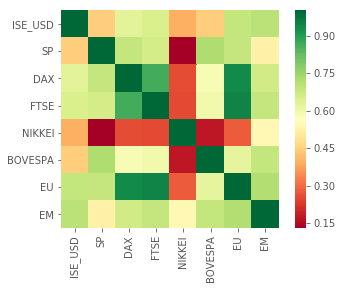

In [17]:
sns.heatmap(df2.corr(), square=True, cmap='RdYlGn')

In [18]:
sns.set(style = 'dark')

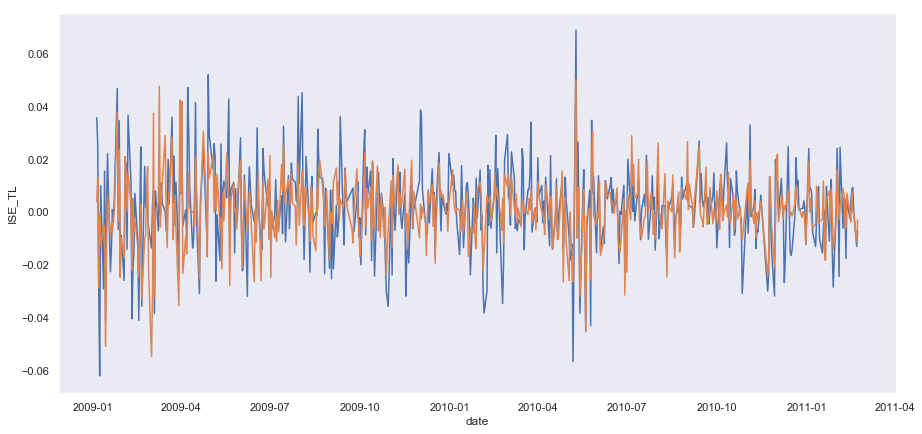

In [19]:
plt.figure(figsize = [15, 7])
plt.plot(df.ISE_TL)
plt.plot(df.FTSE)
plt.xlabel('date')
plt.ylabel('ISE_TL')
plt.show()

In [20]:
# plt.figure(figsize = [12, 7])
# plt.plot(df.ISE_USD)
# plt.show()

In [21]:
# plt.figure(figsize = [12, 7])
# plt.plot(df.SP)
# plt.show()

In [22]:
# plt.figure(figsize = [12, 7])
# plt.plot(df.DAX)
# plt.show()

In [23]:
# plt.figure(figsize = [12, 7])
# plt.plot(df.FTSE)
# plt.show()

In [24]:
# plt.figure(figsize = [12, 7])
# plt.plot(df.NIKKEI)
# plt.show()

In [25]:
# plt.figure(figsize = [12, 7])
# plt.plot(df.BOVESPA)
# plt.show()

In [26]:
# plt.figure(figsize = [12, 7])
# plt.plot(df.EU)
# plt.show()

In [27]:
# plt.figure(figsize = [12, 7])
# plt.plot(df.EM)
# plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
y_pred = reg.predict(X_test)

In [35]:
reg.score(X_test, y_pred)

1.0

In [36]:
error = mean_absolute_error(y_test, y_pred)

In [37]:
error

0.0039043480750752197